<h1>T cell gating</h1>

In [2]:
import sys
if '/home/ross/immunova' not in sys.path:
    sys.path.append('/home/ross/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from warnings import filterwarnings
import pandas as pd
import os
filterwarnings('ignore')
pd_init()

In [3]:
texp = FCSExperiment.objects(experiment_id='PD_T_PDMCs').get()

In [10]:
t = Template(texp, '267-02_pdmc_t')

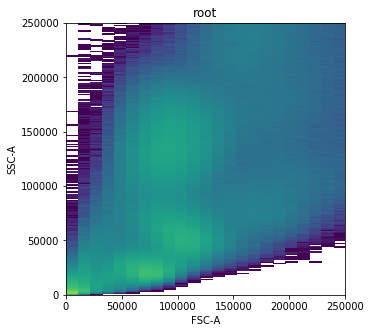

In [11]:
t.plotting.plot_population('root', 'FSC-A', 'SSC-A')

In [12]:
children = ChildPopulationCollection('geom')
children.add_population('raw_auto_cells', definition='+')
children.add_population('raw_auto_debris', definition='-')

In [13]:
kwargs = dict(x='FSC-A', y='SSC-A', transform_x=None, transform_y=None)
t.create_gate(gate_name='raw_auto_boundary', 
              parent='root',
              class_='Static',
              method='border_gate',
              child_populations=children, 
              kwargs=kwargs)

True

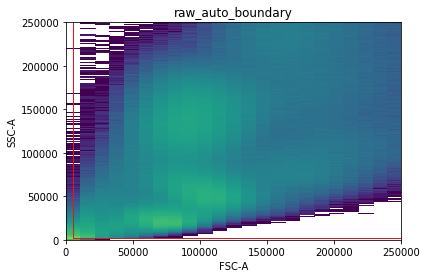

In [14]:
t.apply('raw_auto_boundary')

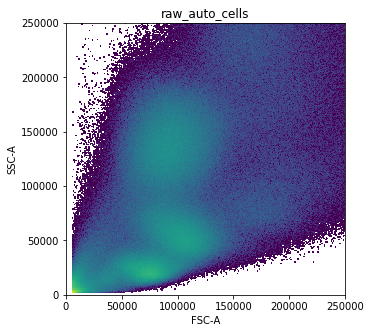

In [15]:
t.plotting.plot_population('raw_auto_cells', 'FSC-A', 'SSC-A')

In [56]:
children = ChildPopulationCollection('cluster')
children.add_population('raw_auto_lymph', target=(75000, 25000), weight=1)
kwargs = dict(x='FSC-A', y='SSC-A', transform_x=None, transform_y=None, 
              min_pop_size=50, frac=0.01)
t.create_gate(gate_name='raw_auto_lymph', 
              parent='raw_auto_cells',
              class_='DensityBasedClustering',
              method='hdbscan',
              child_populations=children, 
              kwargs=kwargs)

True

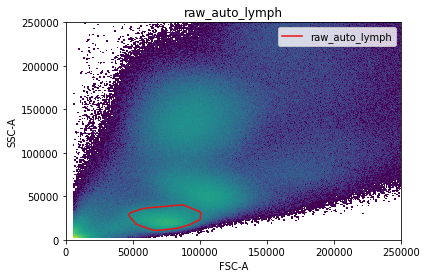

In [57]:
t.apply('raw_auto_lymph')

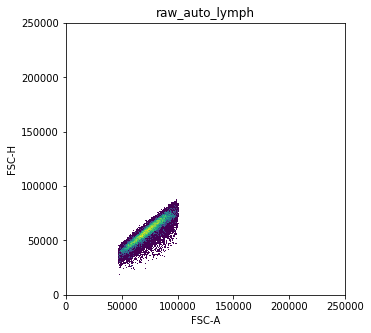

In [58]:
t.plotting.plot_population('raw_auto_lymph', 'FSC-A', 'FSC-H')

In [69]:
children = ChildPopulationCollection('geom')
children.add_population('raw_auto_singlets1', definition='+')
children.add_population('raw_auto_doublets1', definition='-')
kwargs = dict(x='FSC-A', y='FSC-H', transform_x=None, transform_y=None, target=(75000, 60000),
             conf=0.99)
t.create_gate(gate_name='raw_auto_singlets1', 
              parent='raw_auto_lymph',
              class_='MixtureModel',
              method='gate',
              child_populations=children, 
              kwargs=kwargs)

True

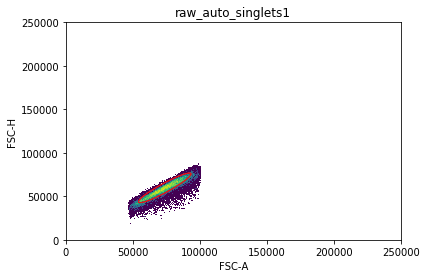

In [70]:
t.apply('raw_auto_singlets1')

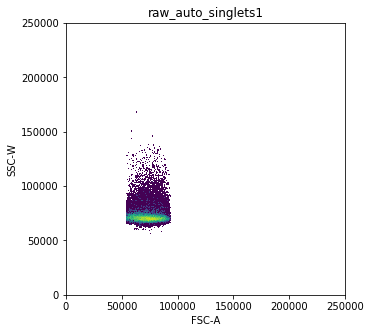

In [71]:
t.plotting.plot_population('raw_auto_singlets1', 'FSC-A', 'SSC-W')

In [72]:
children = ChildPopulationCollection('geom')
children.add_population('raw_auto_singlets2', definition='+')
children.add_population('raw_auto_doublets2', definition='-')
kwargs = dict(x='FSC-A', y='SSC-W', transform_x=None, transform_y=None, target=(75000, 70000),
             conf=0.99)
t.create_gate(gate_name='raw_auto_singlets2', 
              parent='raw_auto_singlets1',
              class_='MixtureModel',
              method='gate',
              child_populations=children, 
              kwargs=kwargs)

True

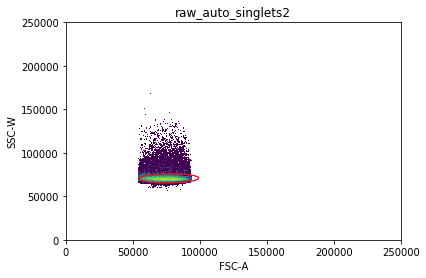

In [73]:
t.apply('raw_auto_singlets2')

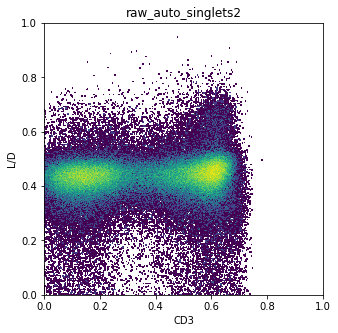

In [74]:
t.plotting.plot_population('raw_auto_singlets2', 'CD3', 'L/D', 
                           transform_x='logicle', transform_y='logicle')

In [75]:
children = ChildPopulationCollection('threshold_2d')
children.add_population('raw_auto_liveCD3', definition='+-')
children.add_population('raw_auto_dead', definition=['--', '-+', '++'])
kwargs = dict(x='CD3', y='L/D', kde_bw=0.05, q=0.95, peak_threshold=0.05)
t.create_gate(gate_name='raw_auto_liveCD3', 
              parent='raw_auto_singlets2',
              class_='DensityThreshold',
              method='gate_2d',
              child_populations=children, 
              kwargs=kwargs)

True

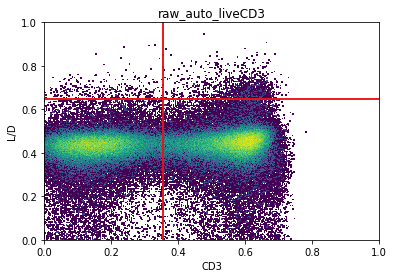

In [76]:
t.apply('raw_auto_liveCD3')

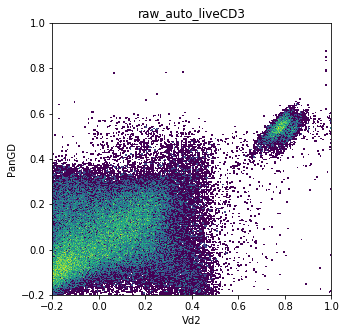

In [81]:
t.plotting.plot_population('raw_auto_liveCD3', 'Vd2', 'PanGD', 
                           transform_x='logicle', transform_y='logicle', 
                           xlim=(-0.2, 1), ylim=(-0.2, 1))

In [84]:
len(t.populations['raw_auto_liveCD3'].index)*0.2

28122.4

In [85]:
children = ChildPopulationCollection('cluster')
children.add_population('raw_auto_gdt', target=(0.8, 0.6), weight=1)
children.add_population('raw_auto_nongdt', target=(0.1, 0.1), weight=1)
kwargs = dict(x='Vd2', y='PanGD', min_pop_size=10, frac=0.2, downsample_method='density')
t.create_gate(gate_name='raw_auto_gdt', 
              parent='raw_auto_liveCD3',
              class_='DensityBasedClustering',
              method='hdbscan',
              child_populations=children, 
              kwargs=kwargs)

True

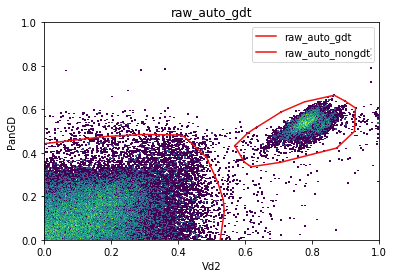

In [87]:
t.apply('raw_auto_gdt')

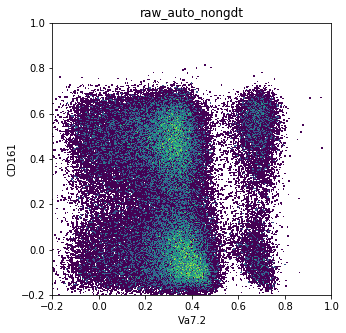

In [89]:
t.plotting.plot_population('raw_auto_nongdt', 'Va7.2', 'CD161', 
                           transform_x='logicle', transform_y='logicle', 
                           xlim=(-0.2, 1), ylim=(-0.2, 1))

In [ ]:
children = ChildPopulationCollection('cluster')
children.add_population('raw_auto_mait', target=(0.8, 0.6), weight=1)
kwargs = dict(x='Vd2', y='PanGD', min_pop_size=10, frac=0.2, downsample_method='density')
t.create_gate(gate_name='raw_auto_gdt', 
              parent='raw_auto_liveCD3',
              class_='DensityBasedClustering',
              method='hdbscan',
              child_populations=children, 
              kwargs=kwargs)

In [95]:
t.populations['raw_auto_gdt'].geom

{'cords': {'x': array('d', [0.5695981932479561, 0.597970945704756, 0.6125221139023791, 0.6198167003868453, 0.706114638215182, 0.8738033173236232, 0.9269766878823498, 0.9300728780241345, 0.8999032288838867, 0.866685799020412, 0.7778659669764237, 0.708642705495421, 0.6250533661730953, 0.607613646562242, 0.5695981932479561]),
  'y': array('d', [0.43270235476363295, 0.3575098382201978, 0.3420545501977559, 0.3362107445214957, 0.35609619561115996, 0.4218230708048687, 0.49865596529938494, 0.6063986482938472, 0.6373056591823707, 0.6647974612462729, 0.6343615231412407, 0.5884001696773933, 0.5078962248590061, 0.4898421112399843, 0.43270235476363295])},
 'shape': 'poly',
 'x': 'Vd2',
 'y': 'PanGD'}

In [77]:
t.print_population_tree()

root
├── raw_auto_cells
│   └── raw_auto_lymph
│       ├── raw_auto_singlets1
│       │   ├── raw_auto_singlets2
│       │   │   ├── raw_auto_liveCD3
│       │   │   └── raw_auto_dead
│       │   └── raw_auto_doublets2
│       └── raw_auto_doublets1
└── raw_auto_debris


In [66]:
t.remove_population('raw_auto_singlets2')

raw_auto_singlets2 does not exist


In [68]:
t.remove_gate('raw_auto_singlets1', propagate=True)

(['raw_auto_singlets2', 'raw_auto_singlets1'],
 ['raw_auto_singlets1',
  'raw_auto_singlets2',
  'raw_auto_doublets2',
  'raw_auto_singlets1',
  'raw_auto_doublets1',
  'raw_auto_doublets1'])

In [46]:
len(t.populations['raw_auto_cells'].index)*0.01

29711.08